In [2]:
import pandas as pd

In [11]:
df = pd.read_csv('../report/metrics/all2.csv')

In [15]:
df

,domain,trial_type,add_data,correctly_predicted,incorrectly_predicted,total_predicted_positives,ground_truth_positives,TP,TN,FP,FN,accuracy,precision,recall,f1
0,games,ba,0,7703,2297,8566,8773,7521,182,1045,1252,77.03,0.785848,0.7703,0.777863
1,games,cp,10,8475,1525,7392,8773,7320,1155,72,1453,84.75,0.923095,0.8475,0.868444
2,games,cp,100,9120,880,8229,8773,8061,1059,168,712,91.20,0.932760,0.9120,0.918576
3,games,cp,1000,8773,1227,10000,8773,8773,0,1227,0,87.73,0.769655,0.8773,0.819960
4,games,cp,10000,8773,1227,10000,8773,8773,0,1227,0,87.73,0.769655,0.8773,0.819960
5,games,re,10,8401,1599,9516,8773,8345,56,1171,428,84.01,0.783540,0.8401,0.808630
6,games,re,100,5840,4160,4629,8773,4621,1219,8,4152,58.40,0.903632,0.5840,0.650323
7,games,re,1000,3861,6139,2636,8773,2635,1226,1,6138,38.61,0.897395,0.3861,0.440259
8,games,re,10000,8950,1050,9545,8773,8634,316,911,139,89.50,0.878784,0.8950,0.873116
9,games,es,10,7936,2064,6811,8773,6760,1176,51,2013,79.36,0.915979,0.7936,0.826458


In [14]:
# df['picking_type'] = df['model'].apply(lambda x : x[-2:])
# df['num_extra_picked'] = df['model'].apply(lambda x : str(int(x.split('_')[1][:-2])))

In [5]:
import seaborn as sns
sns.set_theme(style="darkgrid")

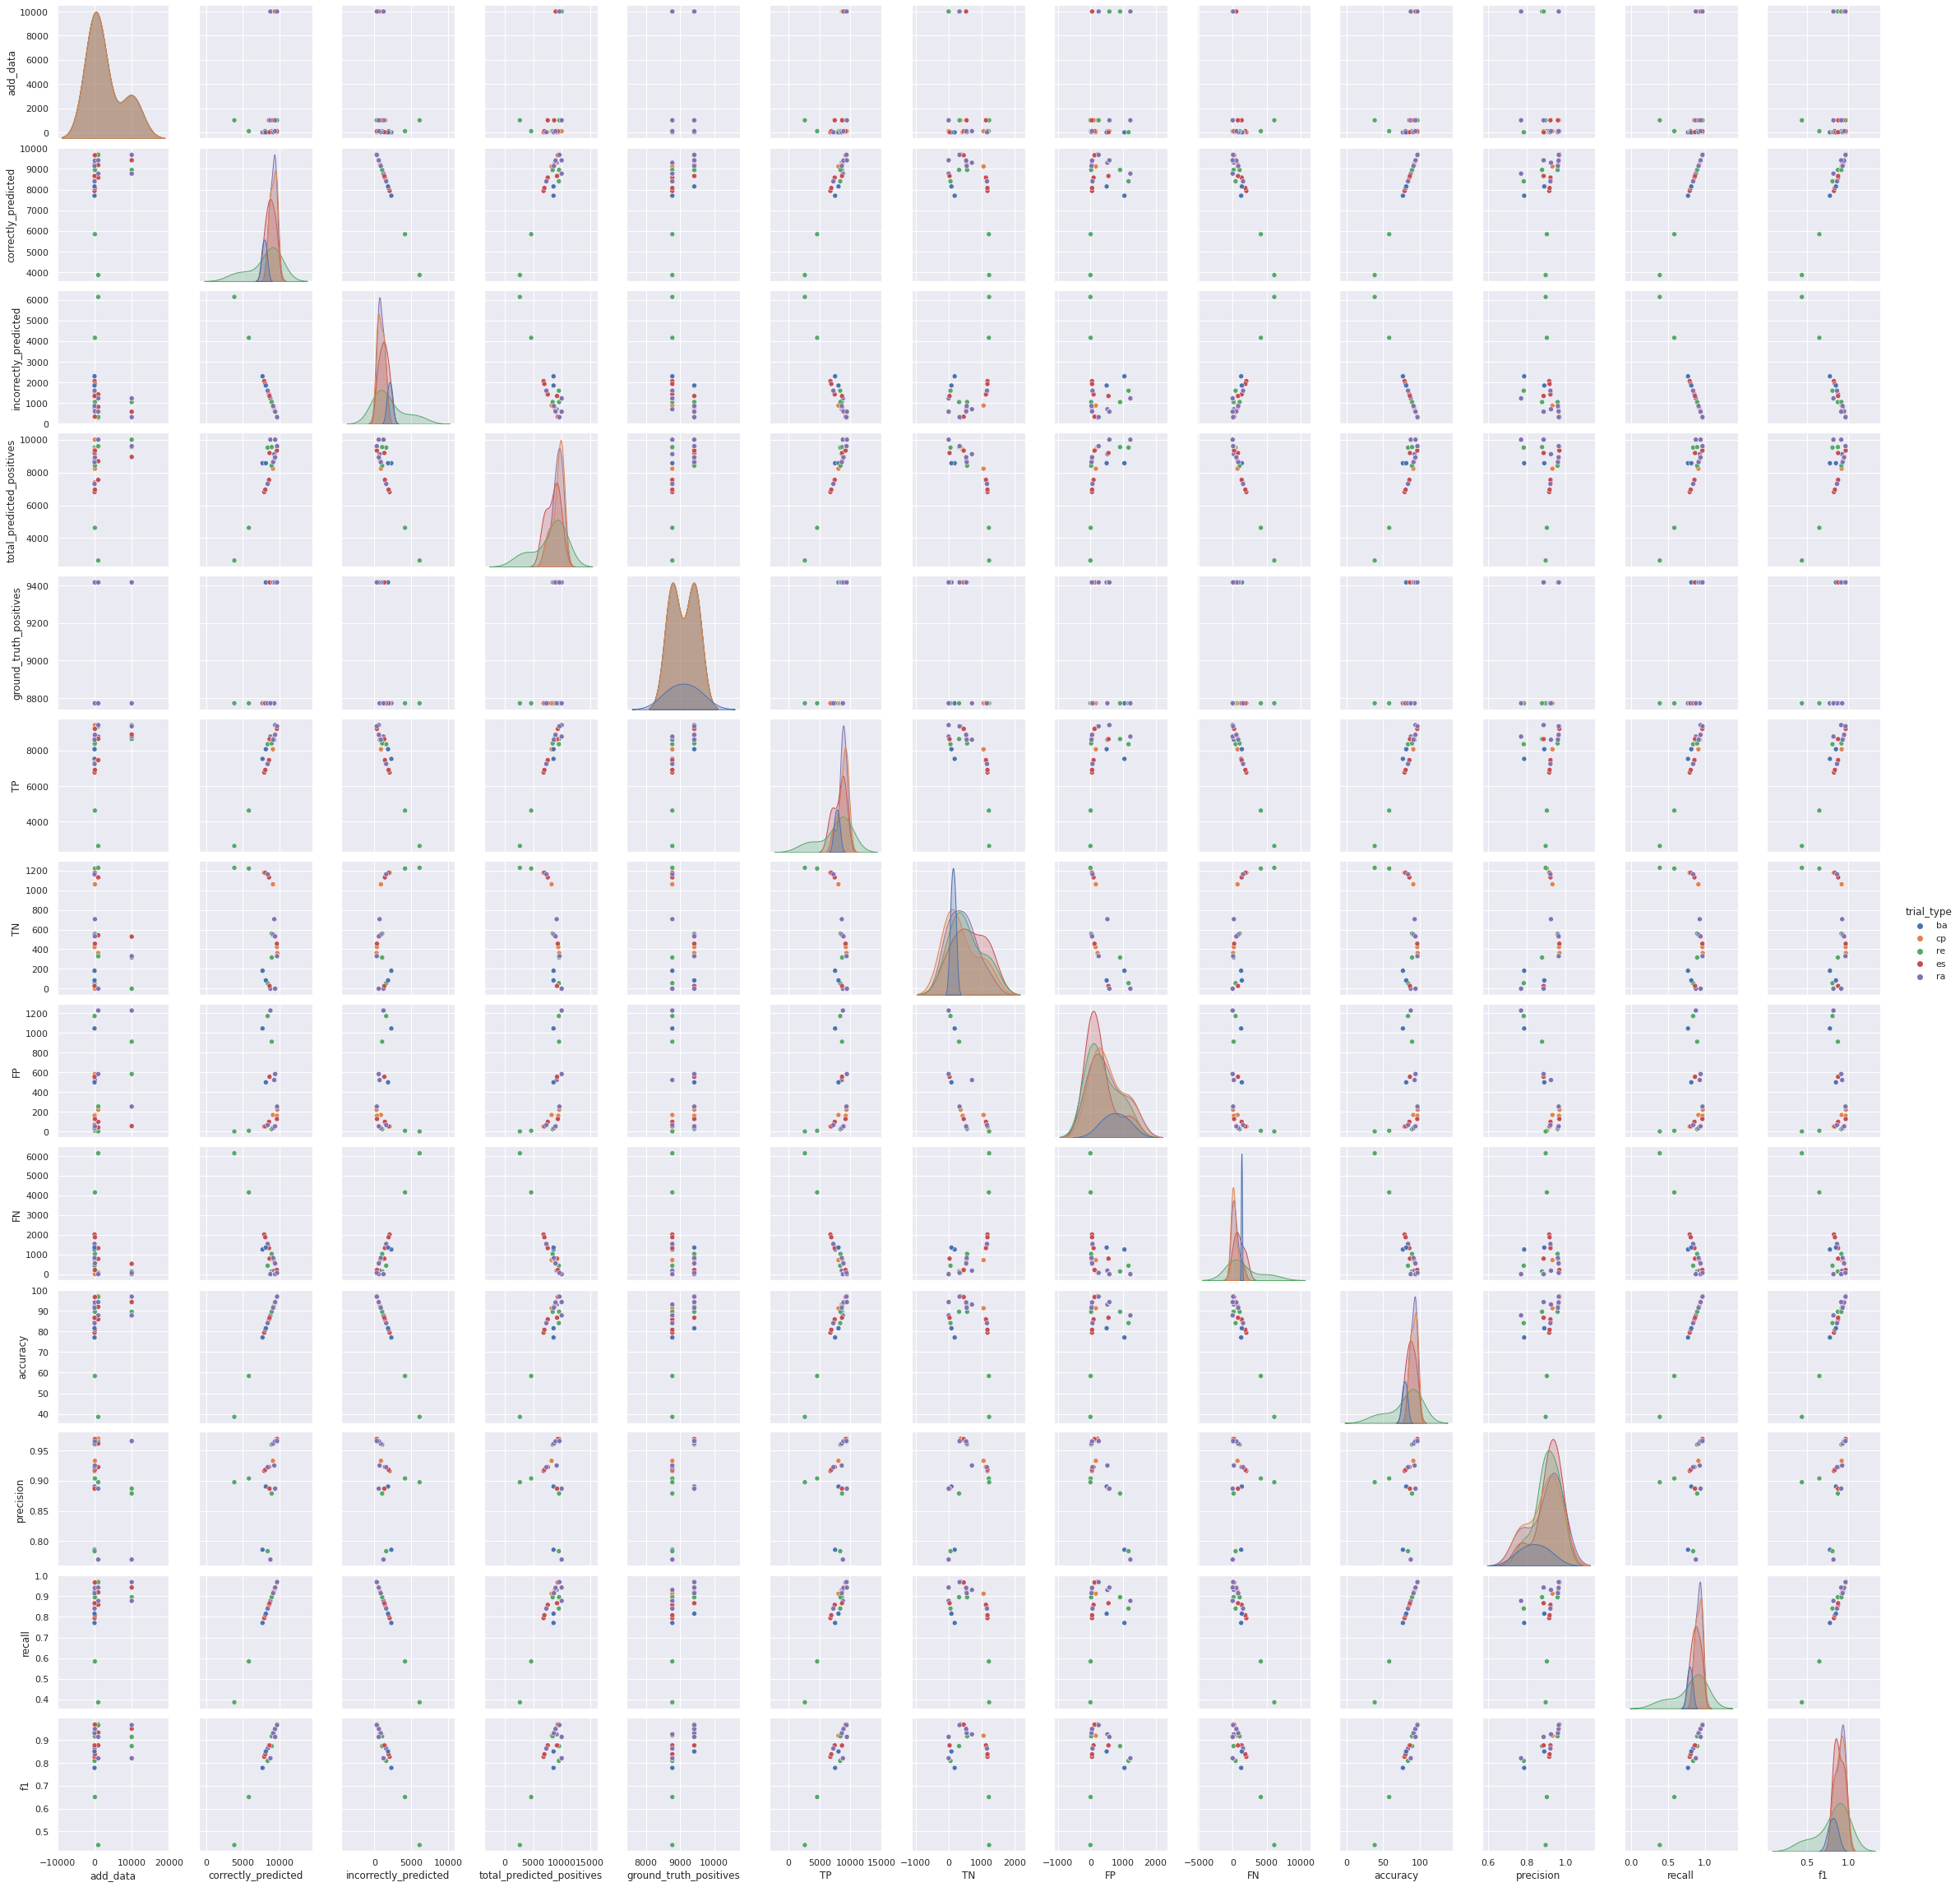

In [26]:
sns.pairplot(df, hue='trial_type');

In [17]:
df.head(3)

,domain,trial_type,add_data,correctly_predicted,incorrectly_predicted,total_predicted_positives,ground_truth_positives,TP,TN,FP,FN,accuracy,precision,recall,f1
0,games,ba,0,7703,2297,8566,8773,7521,182,1045,1252,77.03,0.785848,0.7703,0.777863
1,games,cp,10,8475,1525,7392,8773,7320,1155,72,1453,84.75,0.923095,0.8475,0.868444
2,games,cp,100,9120,880,8229,8773,8061,1059,168,712,91.20,0.932760,0.9120,0.918576


<AxesSubplot:xlabel='trial_type', ylabel='correctly_predicted'>

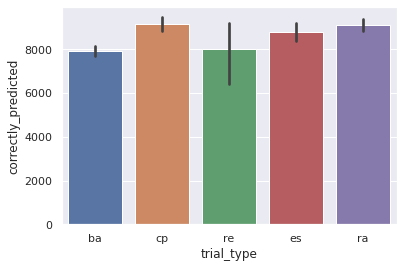

In [16]:
sns.barplot(data=df, x='trial_type', y='correctly_predicted')

<AxesSubplot:xlabel='add_data', ylabel='f1'>

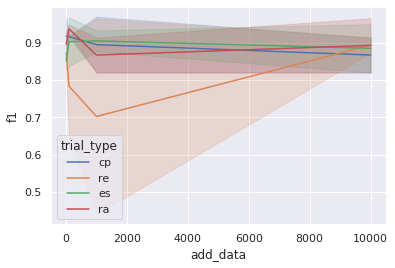

In [20]:
sns.lineplot(data=df[df['trial_type'] != 'ba'], y='f1', hue='trial_type', x='add_data')
# sns.lineplot(data=df, y='f1', x='num_extra_picked', hue='picking_type')

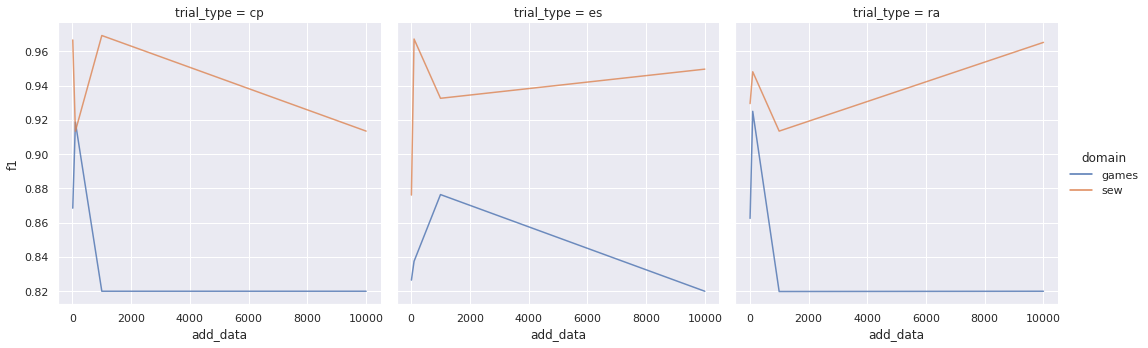

In [33]:
sns.relplot(
    data=df[(df['trial_type'] != 'ba') & (df['trial_type'] != 're')], x="add_data", y="f1",
    col="trial_type", hue="domain", alpha=.8,
    kind="line"
)

re : random (balanced 50/50) not shuffled  
ra : random (not balanced)  
cp : cherry picked  
es : random (balanced 50/50) shuffled  

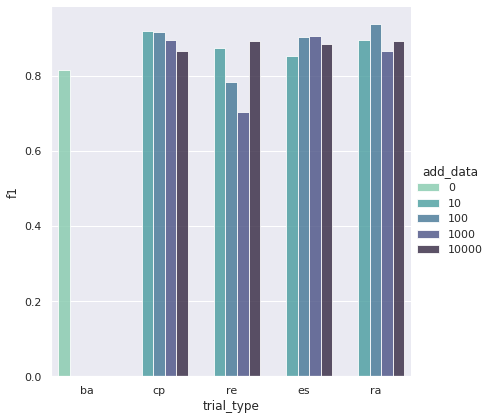

In [24]:
g = sns.catplot(
    data=df, kind="bar",
    x="trial_type", y="f1", hue="add_data",
    ci=None, palette="mako_r", alpha=.8, height=6
)